# Entregable 4: Deep Learning


**Autores:**

- David Moreno Vituri
- Ricardo Sánchez Olivares
- Íñigo Alegre Jiménez


# Actividad Deep Vision

Diseñar y comparar dos estrategias para la clasificación de imágenes en el dataset CIFAR100 de Keras (https://keras.io/api/datasets/cifar100/)

### **Estrategia 1: Red pre-entrenada**

La primera estrategia a comparar debe incluir la utilización de redes preentrenadas con el dataset ImageNet, llevando a cabo tareas de *transfer learning* y *fine-tuning* para clasificar los objetos de CIFAR100. Deben compararse al menos dos tipos de arquitecturas (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet...) y se debe seleccionar la que mayor precisión nos dé (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera que el ejercicio presente una profunda experimentación haciendo uso todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (weight regularization, dropout, batch normalization, data augmentation, etc.).

### **Estrategia 2: Entrenar desde cero o from scratch**

La segunda estrategia a comparar será una red neuronal que se debe diseñar, entrenar y optimizar. Se requiere una justificación empírica de las decisiones que llevaron a la selección de atributos, capas e hiperparámetros a los que se ha llegado. Se espera que el ejercicio presente una profunda experimentación haciendo uso de todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (weight regularization, dropout, batch normalization, data augmentation...).


# Tratamientos previos a la implementación de modelos

In [ ]:
###################################################################################################
BASE_FOLDER = '/content/drive/MyDrive/TAREA 4_Deep_Learning'
###################################################################################################

# Para conectar el notebook con la cuenta de gdrive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Importación de librerías

In [ ]:
# Importamos las librerías necesarias
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tarfile
import pickle
import tensorflow
import random
%matplotlib inline

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from google.colab import drive
from tensorflow.keras.initializers import RandomNormal, Constant

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

## Definición de las funciones de entrenamiento

In [ ]:
# Función de entrenamiento sin aplicar data augmentation (modificar para que los accuracy salgan lo mejor posible)
# Probar 2 o 3 veces cambiando learn_rate,batch_size y epochs
# He estado probando y el batch_size ponerlo en 64 o 32 y el learn_rate bajarlo un poco a 0.0001, 0.0003 o 0.001
# no he podido experimentar mucho porque me tarda la vida (por ahora el que mejor me ha ido ha sido el que tengo puesto)


def train(x_train, y_train, x_test, y_test, pre_trained_model, BASE_FOLDER, nombre ,learn_rate=0.0001):

  # Compilar el modelo
  print("[INFO]: Compilando el modelo...")
  pre_trained_model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=learn_rate), metrics=["accuracy"])

  # Entrenamiento de la red
  print("[INFO]: Entrenando la red...")
  H_pre = pre_trained_model.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.2) # Destinamos 20% a validación
  # Almaceno el modelo en Drive
  # Almacenamos el modelo empleando la función mdoel.save de Keras
  pre_trained_model.save(BASE_FOLDER+"deepCNN_pretrained_"+ nombre +".h5")

  # Evaluación del modelo
  print("[INFO]: Evaluando el modelo...")
  # Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
  predictions = pre_trained_model.predict(x_test, batch_size=64)
  # Sacamos el report para test
  print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

  # Gráficas (si cambiais el batchsize teneis que cambiar el np.arange())
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, 15), H_pre.history["loss"], label="train_loss")
  plt.plot(np.arange(0, 15), H_pre.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, 15), H_pre.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, 15), H_pre.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()
  plt.show()

def train2(x_train, y_train, x_test, y_test, pre_trained_model, BASE_FOLDER, nombre ,learn_rate=0.0001, epochs=20):
  # Resumen del modelo
  model.summary()

  # Compilar el modelo
  print("[INFO]: Compilando el modelo...")
  pre_trained_model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=learn_rate), metrics=["accuracy"])

  # Entrenamiento de la red
  print("[INFO]: Entrenando la red...")
  H_pre = pre_trained_model.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_split=0.2) # Destinamos 20% a validación
  # Almaceno el modelo en Drive
  # Almacenamos el modelo empleando la función mdoel.save de Keras
  pre_trained_model.save(BASE_FOLDER+"deepCNN_pretrained_"+ nombre +".h5")

  # Evaluación del modelo
  print("[INFO]: Evaluando el modelo...")
  # Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
  predictions = pre_trained_model.predict(x_test, batch_size=128)
  # Sacamos el report para test
  print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

  # Gráficas (si cambiais el batchsize teneis que cambiar el np.arange())
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, epochs), H_pre.history["loss"], label="train_loss")
  plt.plot(np.arange(0, epochs), H_pre.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, epochs), H_pre.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, epochs), H_pre.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()
  plt.show()

## Cargamos el conjunto de datos

In [ ]:
# Importando el set de datos CIFAR10
from tensorflow.keras.datasets import cifar100
from sklearn.preprocessing import LabelBinarizer

print("[INFO]: Loading CIFAR-100 data...")
((trainX, trainY), (testX, testY)) = cifar100.load_data()

# CIFAR100 labelnames
labelNames = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

[INFO]: Loading CIFAR-100 data...
169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


## Visualizamos una muestra de los datos

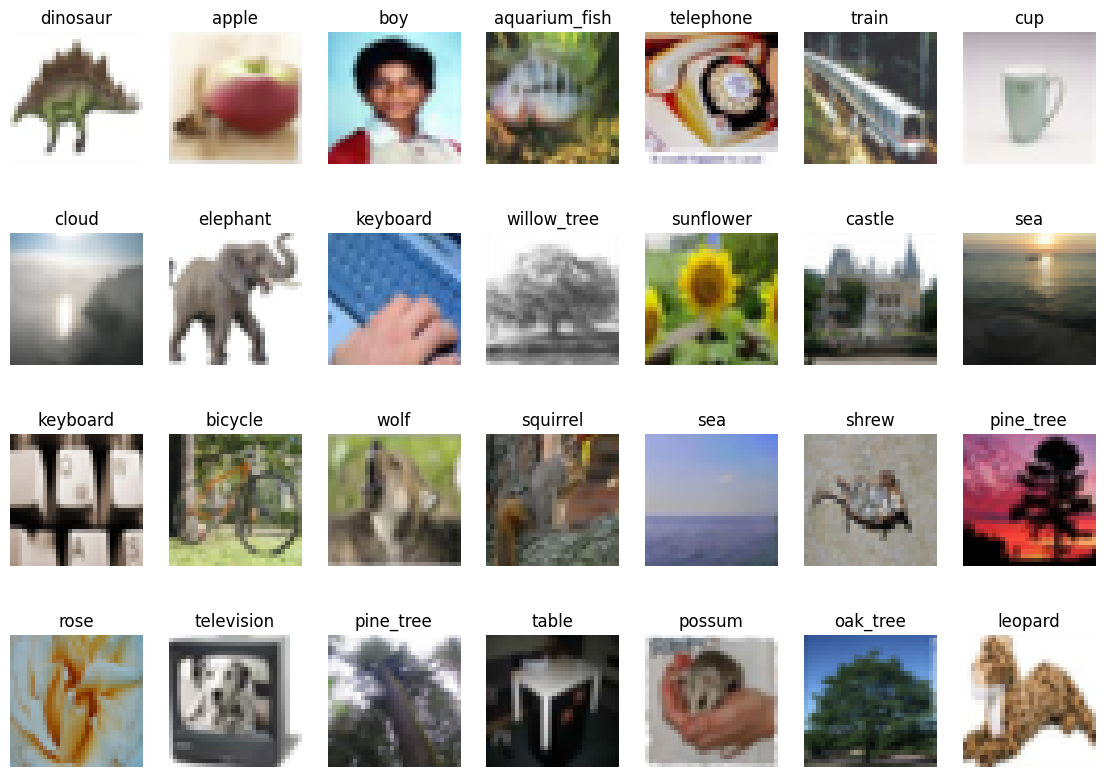

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,10))
for n in range(1, 29):
    fig.add_subplot(4, 7, n)
    img = trainX[n]
    plt.imshow(img)
    plt.title(labelNames[trainY[n][0]])
    plt.axis('off')

Según la página https://www.cs.toronto.edu/~kriz/cifar.html el dataset de CIFAR-100 se compone de 100 clases con 600 imágenes cada una. Hay 500 imágenes de entrenamiento y 100 imágenes de prueba por clase.

Vamos a comprobarlo.

In [ ]:
plt.rcParams.update({'figure.figsize':(15,5), 'figure.dpi':120})

# Plot Histogram on x
plt.hist(trainY, bins=range(0,103), width=0.9, align='left')
plt.xticks(rotation = 90, size=6)
plt.gca().set(title='Número de muestras por clase', ylabel='Número de muestras')

In [ ]:
plt.rcParams.update({'figure.figsize':(15,5), 'figure.dpi':120})

# Plot Histogram on x
plt.hist(testY, bins=range(0,103), width=0.9, align='left')
plt.xticks(rotation = 90, size=6)
plt.gca().set(title='Número de muestras por clase', ylabel='Número de muestras')

Observamos que efectivamente cada una de las clases tiene 500 imagenes de entrenamiento y las otras 100 son para test.

## Preprocesamiento de los datos

In [ ]:
# PREPROCESADO DE LOS DATOS
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

print(trainY.shape)

# Por si es necesario convertir a one-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

print(trainY.shape)
print(trainX.shape)
# Comprobamos si los datos están normalizados
print(trainX.max())
print(trainX.min())

(50000, 1)
(50000, 100)
(50000, 32, 32, 3)
1.0
0.0


# Estrategia 1: Red pre-Entrenada

Para obtener la solución final, vamos a seguir los siguientes pasos:

  1. En primer lugar, se obtienen los resultados tras aplicar TRANSFER LEARNING con distintas redes
  2. Se aplicará FINE TUNING a aquella que mejor accuracy tenga
  3. Se valorará modificar la estructura del TOP MODEL (capas convolucionales y número de neuronas)
  4. Se valorarán distintas técnicas de regularización (weight regularization, dropout y batch normalization)

## Transfer learning con distintas redes

Comenzamos probando distintas redes y comparando los accuracy de cada una de ellas para elegir la que mejor se adecue a nuestro dataset para posteriormente aplicar fine tunning.


### Usamos red ResNet50V2 (accuracy = 0.20)

- Comenzamos con el acondicionamiento de datos para la red ResNet50V2

In [ ]:
from tensorflow.keras.applications.resnet_v2 import preprocess_input

# Los datos están normalizados y preprocess_input requiere un rango [0, 255]
# Multiplicamos *255
trainX, testX = trainX * 255.0, testX * 255.0

# Se normalizan los datos como se normalizaron en el entrenamiento de ImageNet con la red ResNet50V2
trainX = preprocess_input(trainX)
testX = preprocess_input(testX)

- Cargamos el base model

In [ ]:
from tensorflow.keras.applications import ResNet50V2

base_model = ResNet50V2(weights='imagenet',
                 include_top=False,   # no incluimos el total del modelo ya que usamos para preentrenar
                 input_shape=(32,32,3)) # es el tamaño de las imágenes
base_model.summary()

 - Creamos el top model, congelamos todas las capas convolucionales (Transfer Learning) y entrenamos el modelo para ver cual es la accuracy que nos da

In [ ]:
# conectamos el preentrenado a la nueva parte densa

base_model.trainable = False # Evitar que los pesos se modifiquen en la parte convolucional -> TRANSFER LEARNING
pre_trained_model = Sequential()
# Conectar el base model preentrenado a nuestro top model
pre_trained_model.add(base_model)
# Crear top model
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(512, activation='relu'))
pre_trained_model.add(layers.Dense(100, activation='softmax'))

# Entrenando la solución
train(trainX, trainY, testX, testY, pre_trained_model, BASE_FOLDER, 'resnet50v2')

### Usamos red DenseNet121(accuracy = 0.44)

- Comenzamos con el acondicionamiento de datos para la red DenseNet121

In [ ]:
from tensorflow.keras.applications.densenet import preprocess_input

# Los datos están normalizados y preprocess_input requiere un rango [0, 255]
# Multiplicamos *255
trainX, testX = trainX * 255.0, testX * 255.0

# Se normalizan los datos como se normalizaron en el entrenamiento de ImageNet con la red DenseNet121
trainX = preprocess_input(trainX)
testX = preprocess_input(testX)

- Cargamos el base model

In [ ]:
from tensorflow.keras.applications import DenseNet121

base_model = DenseNet121(weights='imagenet',
                 include_top=False,
                 input_shape=(32,32,3))
base_model.summary()

- Creamos el top model, congelamos todas las capas convolucionales (Transfer Learning) y entrenamos el modelo para ver cual es la accuracy que nos da

In [ ]:
# conectamos el preentrenado a la nueva parte densa

base_model.trainable = False # Evitar que los pesos se modifiquen en la parte convolucional -> TRANSFER LEARNING
pre_trained_model = Sequential()
# Conectar el base model preentrenado a nuestro top model
pre_trained_model.add(base_model)

# Crear top model
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(512, activation='relu'))
pre_trained_model.add(layers.Dense(100, activation='softmax'))

# Entrenando la solución
train(trainX, trainY, testX, testY, pre_trained_model, BASE_FOLDER,'densenet121')

### Usamos red ResNet101V2 (accuracy = 0.13)

- Comenzamos con el acondicionamiento de datos para la red ResNet101V2

In [ ]:
from tensorflow.keras.applications.resnet_v2 import preprocess_input

# Los datos están normalizados y preprocess_input requiere un rango [0, 255]
# Multiplicamos *255
trainX, testX = trainX * 255.0, testX * 255.0

# Se normalizan los datos como se normalizaron en el entrenamiento de ImageNet con la red ResNet101V2
trainX = preprocess_input(trainX)
testX = preprocess_input(testX)

- Cargamos el base model

In [ ]:
from tensorflow.keras.applications import ResNet101V2

base_model = ResNet101V2(weights='imagenet',
                 include_top=False,
                 input_shape=(32,32,3))
base_model.summary()

- Creamos el top model, congelamos todas las capas convolucionales (Transfer Learning) y entrenamos el modelo para ver cual es la accuracy que nos da

In [ ]:
# conectamos el preentrenado a la nueva parte densa

base_model.trainable = False # Evitar que los pesos se modifiquen en la parte convolucional -> TRANSFER LEARNING
pre_trained_model = Sequential()
# Conectar el base model preentrenado a nuestro top model
pre_trained_model.add(base_model)

# Crear top model
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(512, activation='relu'))
pre_trained_model.add(layers.Dense(100, activation='softmax'))

# Entrenando la solución
train(trainX, trainY, testX, testY, pre_trained_model, BASE_FOLDER,'ResNet101V2')

### Análisis de resultados

Los modelos preentrenados probados para la clasificación de imágenes en el dataset CIFAR100, ResNet50V2, DenseNet121 y ResNet101V2, han mostrado diferentes niveles de precisión en sus resultados iniciales. DenseNet121 obtuvo el mejor rendimiento con un 44% de precisión, seguido por ResNet50V2 con un 20%, mientras que ResNet101V2 logró un 13%. Estos resultados sugieren que DenseNet121, conocida por su eficiente flujo de información entre capas, podría estar mejor adaptada a las características del dataset. Por otro lado, la baja precisión de ResNet101V2 indica que una mayor profundidad no siempre resulta beneficiosa, posiblemente debido a que CIFAR100, siendo un dataset pequeño, no permite aprovechar la complejidad de redes profundas sin ajustes adicionales.

## Fine Tuning

Ahora, basándonos en estos resultados iniciales, realizamos un fine-tuning para intentar mejorar los resultados de DenseNet121, el modelo que mostró mejor rendimiento. Vamos descongelando bloques convolucionales con el objetivo de ajustar finamente los pesos sin borrar el conocimiento adquirido anteriormente por la red pre-entrenada, intentando extraer más información de la misma.

In [ ]:
base_model = DenseNet121(weights='imagenet',
                 include_top=False,
                 input_shape=(32,32,3))
base_model.summary()

In [ ]:
# Por defecto todas las capas estás a layer.trainable = True (entrenables)
# En base_model.layers.name tenemos la información del nombre de la capa
# Vamos congelando capas
# Reentrenamos a partir de la capa conv4_block6_1_conv
for layer in base_model.layers:
  if layer.name == 'conv2_block1_2_conv':
    break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada...')

# conectamos el preentrenado a la nueva parte densa

pre_trained_model = Sequential()
# Conectar el base model preentrenado a nuestro top model
pre_trained_model.add(base_model)

# Crear top model
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(512, activation='relu'))
pre_trained_model.add(layers.Dense(100, activation='softmax'))

# Entrenando la solución
train(trainX, trainY, testX, testY, pre_trained_model, BASE_FOLDER,'ResNet101V2')

### Análisis de resultados

## Ajuste de la estructura Top Model

En este código se realizan diferentes modificaciones al "Top Model" de una red preentrenada (en este caso, DenseNet121), explorando varias configuraciones de capas densas y regularización para mejorar la precisión de clasificación en CIFAR100. El análisis de estos ajustes puede ayudar a entender cómo cada cambio afecta al rendimiento y si se puede mejorar el modelo sin modificar los pesos del modelo base.

### Modificacion Hidden Layer

- La primera configuración reduce la cantidad de neuronas en la capa densa de 512 a 256, con la intención de simplificar el modelo y reducir posibles problemas de sobreajuste.

- Al reducir el número de neuronas, el modelo puede volverse menos complejo y podría generalizar mejor en el conjunto de datos de prueba. Sin embargo, este cambio puede reducir la capacidad del modelo para capturar patrones complejos, especialmente si la red inicial ya tiene dificultades para obtener una precisión alta.

**Conclusión**: Este ajuste es útil para observar si el modelo responde mejor con una red más ligera.

In [ ]:
# conectarlo a nueva parte densa
base_model.trainable = False # Evitar que los pesos se modifiquen en la parte convolucional -> TRANSFER LEARNING
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(256, activation='relu'))
pre_trained_model.add(layers.Dense(100, activation='softmax'))
pre_trained_model.summary()

# Entrenando la solución
train(trainX, trainY, testX, testY, pre_trained_model, BASE_FOLDER,'densenet121')

### Añadir nuevas Hidden Layer

Finalmente, observamos que añadir más hidden layers no resultaba beneficioso ya que la precisión no mejoraba, es decir, el aumento de la complejidad del modelo no ayudaba en la precisión, al contrario, la disminuía.

In [ ]:
# conectarlo a nueva parte densa
#base_model.trainable = False # Evitar que los pesos se modifiquen en la parte convolucional -> TRANSFER LEARNING
#pre_trained_model = Sequential()
#pre_trained_model.add(base_model)
#pre_trained_model.add(layers.Flatten())
#pre_trained_model.add(layers.Dense(1024, activation='relu'))
#pre_trained_model.add(layers.Dense(256, activation='relu'))
#pre_trained_model.add(layers.Dense(100, activation='softmax'))
#pre_trained_model.summary()

# Entrenando la solución
#train(trainX, trainY, testX, testY, pre_trained_model, BASE_FOLDER,'densenet121')

### Weight Regularization L2

- Aquí se usa regularización L2 en dos capas densas, lo que penaliza pesos grandes y ayuda a prevenir el sobreajuste.

- La regularización L2 es efectiva ya que reduce la complejidad al hacer que los pesos converjan hacia valores más pequeños. Este ajuste es útil cuando el modelo muestra un alto rendimiento en entrenamiento pero falla en generalizar en el conjunto de prueba, como es nuestro caso.

**Conclusión**: La regularización L2 es una técnica efectiva para mejorar la generalización, y este ajuste muestra levemente una mejora de overfitting.

In [ ]:
# conectarlo a nueva parte densa
base_model.trainable = False # Evitar que los pesos se modifiquen en la parte convolucional -> TRANSFER LEARNING
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
pre_trained_model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
pre_trained_model.add(layers.Dense(100, activation='softmax'))

# Entrenando la solución
train(trainX, trainY, testX, testY, pre_trained_model, BASE_FOLDER,'densenet121')

### DropOut

- Se utiliza una capa Dropout con una tasa del 75%, que desactiva de manera aleatoria un 75% de las neuronas durante el entrenamiento para reducir la dependencia de la red en ciertos caminos neuronales.

- Dropout es útil para mejorar la generalización y evitar el sobreajuste, especialmente en redes densas.

In [ ]:
# conectarlo a nueva parte densa
base_model.trainable = False # Evitar que los pesos se modifiquen en la parte convolucional -> TRANSFER LEARNING
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(512, activation='relu'))
pre_trained_model.add(Dropout(0.3))
pre_trained_model.add(layers.Dense(100, activation='softmax'))

# Entrenando la solución
train(trainX, trainY, testX, testY, pre_trained_model, BASE_FOLDER,'densenet121')

### Batch Normalitation

- Aquí se aplica Batch Normalization después de la capa densa, lo que ayuda a estabilizar y acelerar el entrenamiento normalizando las salidas de cada capa.

- Batch Normalization es útil cuando el modelo tarda en converger o muestra fluctuaciones en la precisión, y suele mejorar tanto el rendimiento como la estabilidad del modelo. Además, actúa como una forma de regularización leve.

In [ ]:
# conectarlo a nueva parte densa
base_model.trainable = False # Evitar que los pesos se modifiquen en la parte convolucional -> TRANSFER LEARNING
pre_trained_model = Sequential()
pre_trained_model.add(base_model)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(512, activation='relu'))
pre_trained_model.add(BatchNormalization())
pre_trained_model.add(layers.Dense(100, activation='softmax'))

# Entrenando la solución
train(trainX, trainY, testX, testY, pre_trained_model, BASE_FOLDER)

# Estrategia 2: Entrenando red from scratch

A continuación, se plantea el diseño, entrenamiento y optimización de una red neuronal como segunda estrategia de modelado, con el objetivo de maximizar su capacidad predictiva. Este proceso implica tomar decisiones fundamentadas sobre la selección de atributos, la arquitectura de la red (número de capas y tipos de neuronas) y los hiperparámetros, utilizando un enfoque empírico basado en experimentación y resultados. Cada elección será justificada en función de su impacto en el rendimiento del modelo, considerando técnicas avanzadas de optimización como regularización de pesos, dropout, batch normalization y data augmentation.

## Primer modelo (accuracy = 0.37 con 7,373,476 parámetros entrenables)

Este modelo inicial se compone de una arquitectura con cuatro bloques secuenciales de CONV => RELU => CONV => RELU => POOL en el base model, que progresivamente aumentan el número de filtros, y un top model con dos capas densas de 1024 y 512 neuronas, respectivamente. Además, se aplican técnicas de regularización como Batch Normalization y Dropout en el top model, lo cual ayuda a estabilizar el entrenamiento y a reducir el riesgo de sobreajuste.

Limitaciones: La precisión inicial de 0.37 indica que el modelo probablemente no está extrayendo de manera óptima las características de los datos, lo que sugiere que podría beneficiarse de mayor capacidad de representación o de un entrenamiento más prolongado.

In [ ]:
# ---------------------------------------------------------------------
# BASE MODEL -> extrae las características de las imágenes

# Definimos entradas
inputs = Input(shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3]))

# Primer bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(64, (3, 3), padding="same", activation="relu")(inputs)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

# Segundo bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.4)(x)

# Tercer bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.4)(x)

# Cuarto bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(512, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.5)(x)

# Clasificador FC => RELU
xfc = Flatten()(x)
xfc = Dense(1024, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)

# Capa de salida con softmax para clasificación
predictions = Dense(100, activation="softmax")(xfc)  # 100 clases para CIFAR-100

#Creamos el modelo
model = Model(inputs=inputs, outputs=predictions)

# Entrenando la solución
train2(trainX, trainY, testX, testY, model, BASE_FOLDER,'fromscratch',0.0001)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,373,476 (28.13 MB)

 Trainable params: 7,366,564 (28.10 MB)

 Non-trainable params: 6,912 (27.00 KB)

[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...


KeyboardInterrupt: 

## Segundo modelo (accuracy = 0.51 con 7,570,264 parámetros entrenables)

Para mejorar la precisión, se implementaron tres cambios clave:

- **Bloque adicional en el base model**: Se añadió un bloque adicional de CONV => RELU => CONV => RELU => POOL. Esto aumentó la profundidad del modelo, permitiéndole capturar características más complejas y detalladas de las imágenes. Al añadir más capas de convolución, el modelo puede extraer patrones más abstractos, lo que suele traducirse en una mejora en la precisión.

- **Ajuste de Batch Normalization**: Se modificaron los parámetros de la capa de Batch Normalization en el top model (momentum, epsilon, y los inicializadores para beta y gamma). Estos cambios hacen que la normalización de los datos sea más estable y adaptativa, lo que ayuda a que el modelo aprenda de manera más eficiente durante el entrenamiento.

- **Mayor número de épocas**: Al entrenar por más épocas, el modelo tiene la oportunidad de ajustar mejor sus parámetros y aprender patrones más sutiles de los datos.

**Resultado**: Estos cambios incrementaron la precisión a 0.51, lo cual indica que la combinación de mayor profundidad, una Batch Normalization mejor ajustada y un entrenamiento más prolongado ayudaron al modelo a capturar mejor las características relevantes en los datos. Aún así observamos un gran sobreajuste de los datos (clara diferencia entre train y validation en las gráficas), cosa que deberemos mejorar.


In [ ]:
# BASE MODEL -> extrae las características de las imágenes

# Definimos entradas
inputs = Input(shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3]))

# Primer bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(64, (3, 3), padding="same", activation="relu")(inputs)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

# Primer bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(128, (3, 3), padding="same", activation="relu")(inputs)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

# Segundo bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.4)(x)

# Tercer bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.4)(x)

# Cuarto bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(512, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.5)(x)

# Clasificador FC => RELU
xfc = Flatten()(x)
xfc = Dense(1024, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)
xfc = Dense(512, activation="relu")(xfc)

# capa batch personalizada
xfc = BatchNormalization(momentum=0.95,
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05),
        gamma_initializer=Constant(value=0.9))(xfc)

xfc = Dense(100, activation="relu")(xfc)
xfc = Dropout(0.5)(xfc)

# Capa de salida con softmax para clasificación
predictions = Dense(100, activation="softmax")(xfc)  # 100 clases para CIFAR-100

#Creamos el modelo
model = Model(inputs=inputs, outputs=predictions)

# Entrenando la solución
train2(trainX, trainY, testX, testY, model, BASE_FOLDER,'fromscratch2',0.0001, 40)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,570,264 (28.88 MB)

 Trainable params: 7,563,096 (28.85 MB)

 Non-trainable params: 7,168 (28.00 KB)

[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...
Epoch 1/40


KeyboardInterrupt: 

## Tercer modelo (accuracy = 0.54 con 7,275,236 parámetros entrenables)

Para este modelo, se continuó aumentando la capacidad y complejidad del modelo con los siguientes cambios:

- **Bloque adicional de convolución**: Se añadió un nuevo bloque CONV => RELU => CONV => RELU => POOL en el base model, aumentando aún más la profundidad de la red y su capacidad para extraer características complejas.

- **Ajustes en Dropout y más neuronas en el top model**: Se incrementó la cantidad de neuronas en las capas densas del top model y se ajustaron las tasas de Dropout. Al añadir más neuronas, el modelo gana capacidad para aprender patrones complejos en la parte final de la red, lo que refuerza su habilidad para clasificar de manera precisa. Además, ajustar la tasa de Dropout permite un equilibrio adecuado entre capacidad y regularización, reduciendo el riesgo de sobreajuste.

**Resultado**: Estos cambios incrementaron la precisión a 0.54. Al aumentar la profundidad y la capacidad en el top model, el modelo ha podido capturar características de mayor complejidad sin lograr reducir el sobreajuste que teníamos anteriormente.

In [ ]:
# BASE MODEL -> extrae las características de las imágenes

# Definimos entradas
inputs = Input(shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3]))

# Primer bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(64, (3, 3), padding="same", activation="relu")(inputs)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

# Primer bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(128, (3, 3), padding="same", activation="relu")(inputs)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

# Segundo bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

# Tercer bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

# Tercer bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.4)(x)

# Cuarto bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(512, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.5)(x)

# Clasificador FC => RELU
xfc = Flatten()(x)
xfc = Dense(1024, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.5)(xfc)
xfc = Dense(512, activation="relu")(xfc)

# capa batch personalizada
xfc = BatchNormalization(momentum=0.95,
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05),
        gamma_initializer=Constant(value=0.9))(xfc)

xfc = Dense(256, activation="relu")(xfc)
xfc = Dropout(0.3)(xfc)

# Capa de salida con softmax para clasificación
predictions = Dense(100, activation="softmax")(xfc)  # 100 clases para CIFAR-100

#Creamos el modelo
model = Model(inputs=inputs, outputs=predictions)

# Entrenando la solución
train2(trainX, trainY, testX, testY, model, BASE_FOLDER,'fromscratch3',0.0001, 40)

## Cuarto modelo (accuracy = 0.59 con 6,975,972 parámetros entrenables)

En este último modelo, se adoptó un enfoque más compacto y eficiente con la intención de no mejorar tanto en precisión sino más en ajustar el overfitting para que no fuese tan notorio. Para ello llevamos a cabo los siguientes pasos:

- **Reducción en el número de bloques de convolución**: En lugar de seis bloques, se redujo el base model a cuatro bloques, pero con un mayor número de filtros en cada bloque. Este cambio busca un equilibrio entre profundidad y eficiencia. Al hacer que cada bloque sea más denso (mayor número de filtros), el modelo puede extraer información de alto nivel sin necesidad de aumentar excesivamente su profundidad, lo cual reduce la cantidad de parámetros.

- **Simplificación del top model**: Se redujo el número de neuronas en las capas densas del top model. Esta decisión ayuda a reducir la complejidad del modelo, lo que disminuye el riesgo de sobreajuste y la posibilidad de que el modelo se "sobreespecialice" en los datos de entrenamiento. Además, menos neuronas también reducen el número total de parámetros, logrando un modelo más eficiente y menos propenso a memorizar el ruido de los datos.

- **Mayor número de épocas**: Al entrenar por más épocas, el modelo tiene la oportunidad de ajustar mejor sus parámetros y aprender patrones más sutiles de los datos.

**Resultado**: Estos ajustes llevaron a una precisión de 0.59, un incremento significativo con menos parámetros (6,975,972) en comparación con los modelos anteriores. La red neuronal ahora es más eficiente, compacta y robusta, capaz de captar patrones relevantes de los datos y reduciendo el sobreajuste bastante respecto a las anteriores redes neuronales.

In [ ]:
# BASE MODEL -> extrae las características de las imágenes

# Definimos entradas
inputs = Input(shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3]))

# Primer bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(128, (3, 3), padding="same", activation="relu")(inputs)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)

# Segundo bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)

# Tercer bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)

# Cuarto bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(512, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.4)(x)

# Clasificador FC => RELU
xfc = Flatten()(x)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.2)(xfc)

# capa batch personalizada
xfc = BatchNormalization(momentum=0.95,
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05),
        gamma_initializer=Constant(value=0.9))(xfc)

xfc = Dense(256, activation="relu")(xfc)
xfc = Dropout(0.2)(xfc)

# Capa de salida con softmax para clasificación
predictions = Dense(100, activation="softmax")(xfc)  # 100 clases para CIFAR-100

#Creamos el modelo
model = Model(inputs=inputs, outputs=predictions)

# Entrenando la solución
train2(trainX, trainY, testX, testY, model, BASE_FOLDER,'fromscratch3',0.0001, 100)

## Quinto modelo (accuracy = 0.60 con 6,975,972 parámetros entrenables)

En este modelo, se realizaron dos cambios clave:

- **Aumento de Dropout en cada capa**: Al aumentar la tasa de Dropout en las capas del modelo, se introdujo una regularización adicional que fuerza al modelo a no depender de combinaciones específicas de neuronas, sino a aprender representaciones más robustas. Esto ayuda a reducir el sobreajuste al forzar al modelo a generalizar mejor, lo que contribuye a una mejora en la precisión al evitar que memorice los datos de entrenamiento.

- **Implementación de Kernel Regularization L2**: Se añadió L2 Regularization (kernel_regularizer=regularizers.l2(0.001)) en las capas convolucionales del último bloque y en el top model. La regularización L2 penaliza los pesos excesivamente grandes, incentivando al modelo a mantener pesos más pequeños y estables. Esto contribuye a reducir el sobreajuste, ya que previene que el modelo dependa de pesos específicos para tomar decisiones, promoviendo una generalización mejorada.

**Resultado**: Estos ajustes lograron una mejora en la precisión, llevándola a 0.60. La combinación de mayor Dropout y regularización L2 permitió que el modelo se volviera más robusto, manteniendo el número de parámetros entrenables (6,975,972) pero mejorando su capacidad para generalizar en nuevos datos.

In [ ]:
# BASE MODEL -> extrae las características de las imágenes

# Definimos entradas
inputs = Input(shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3]))

# Primer bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(128, (3, 3), padding="same", activation="relu")(inputs)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

# Segundo bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

# Tercer bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

# Cuarto bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(512, (3, 3), padding="same", activation="relu",kernel_regularizer=regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3, 3), padding="same", activation="relu",kernel_regularizer=regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.5)(x)

# Clasificador FC => RELU
xfc = Flatten()(x)
xfc = Dense(512, activation="relu",kernel_regularizer=regularizers.l2(0.001))(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.3)(xfc)

# capa batch personalizada
xfc = BatchNormalization(momentum=0.95,
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05),
        gamma_initializer=Constant(value=0.9))(xfc)

xfc = Dense(256, activation="relu",kernel_regularizer=regularizers.l2(0.001))(xfc)
xfc = Dropout(0.3)(xfc)

# Capa de salida con softmax para clasificación
predictions = Dense(100, activation="softmax")(xfc)  # 100 clases para CIFAR-100

#Creamos el modelo
model = Model(inputs=inputs, outputs=predictions)

# Entrenando la solución
train2(trainX, trainY, testX, testY, model, BASE_FOLDER,'fromscratch3',0.0001, 100)

## Modelos de data augmentation

Para reducir el sobreajuste que sigue siendo significativo decidimos aplicar Data Augmentation en los modelos con precisión de 0.59 y 0.60:

- **Data Augmentation**: La técnica de Data Augmentation crea nuevas instancias de datos de entrenamiento mediante transformaciones aleatorias (en nuestro caso rotación y volteo). Al aumentar la diversidad del conjunto de entrenamiento, el modelo ve variaciones de los mismos datos y aprende a reconocer patrones invariantes, lo cual mejora su capacidad de generalización. En este caso, la aplicación de Data Augmentation logró reducir significativamente el sobreajuste, ya que el modelo ahora estaba expuesto a un conjunto de datos más variado y menos propenso a memorizar los detalles específicos de cada instancia de entrenamiento.

**Resultado**: Con Data Augmentation, se logró un accuracy de 0.61 en ambos modelos y una reducción claramente significativa del overfitting.

### Modelo data augmentation (accuracy = 0.61 con 6,975,972 parámetros entrenables)

In [ ]:
# Función de entrenamiento aplicando data augmentation
def train_with_datagen(x_train, y_train, x_test, y_test, model_aug, BASE_FOLDER, train_datagen, learn_rate=0.0005, epochs=20):
  # Resumen del modelo
  model.summary()

  # Entrenando la solución con data augmentation
  train_generator = train_datagen.flow(
    x_train,
    y_train,
    batch_size=128,
    subset='training'
  )

  validation_generator = train_datagen.flow(
    x_train,
    y_train,
    batch_size=128,
    subset='validation'
  )

  # Compilar el modelo
  print("[INFO]: Compilando el modelo...")
  model.compile(loss="categorical_crossentropy", optimizer=RMSprop(learning_rate=learn_rate), metrics=["accuracy"])

  # Entrenamiento de la red
  print("[INFO]: Entrenando la red...")

  H_aug = model.fit(
            train_generator,
            validation_data = validation_generator,
            epochs = epochs)

  # Almacenos el modelo en Drive
  # Montamos la unidad de Drive
  drive.mount('/content/drive')
  # Almacenamos el modelo empleando la función mdoel.save de Keras
  model.save(BASE_FOLDER+"deepCNN_"+ 'fromscratchaugmentation' +".h5")

  # Evaluación del modelo
  print("[INFO]: Evaluando el modelo...")
  # Efectuamos la predicción (empleamos el mismo valor de batch_size que en training)
  predictions = model.predict(x_test, batch_size=128)
  # Sacamos el report para test
  print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

  # Gráficas
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, epochs), H_aug.history["loss"], label="train_loss")
  plt.plot(np.arange(0, epochs), H_aug.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, epochs), H_aug.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, epochs), H_aug.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()
  plt.show()

In [ ]:
# BASE MODEL -> extrae las características de las imágenes

# Definimos entradas
inputs = Input(shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3]))

# Primer bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(128, (3, 3), padding="same", activation="relu")(inputs)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)

# Segundo bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)

# Tercer bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)

# Cuarto bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(512, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.4)(x)

# Clasificador FC => RELU
xfc = Flatten()(x)
xfc = Dense(512, activation="relu")(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.2)(xfc)

# capa batch personalizada
xfc = BatchNormalization(momentum=0.95,
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05),
        gamma_initializer=Constant(value=0.9))(xfc)

xfc = Dense(256, activation="relu")(xfc)
xfc = Dropout(0.2)(xfc)

# Capa de salida con softmax para clasificación
predictions = Dense(100, activation="softmax")(xfc)  # 100 clases para CIFAR-100

#Creamos el modelo
model = Model(inputs=inputs, outputs=predictions)

# Entrenando la solución con data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    ##################################################
    validation_split=0.2,
    ##################################################
    )

# Entrenando la solución
train_with_datagen(trainX, trainY, testX, testY, model, BASE_FOLDER, train_datagen, 0.0001, 100)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 6,975,972 (26.61 MB)

 Trainable params: 6,969,316 (26.59 MB)

 Non-trainable params: 6,656 (26.00 KB)

[INFO]: Compilando el modelo...
[INFO]: Entrenando la red...
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 84/313 ━━━━━━━━━━━━━━━━━━━━ 43:59 12s/step - accuracy: 0.0176 - loss: 4.8629

KeyboardInterrupt: 

### Último modelo (accuracy = 0.61 con 6,975,972 parámetros entrenables)

In [ ]:
# BASE MODEL -> extrae las características de las imágenes

# Definimos entradas
inputs = Input(shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3]))

# Primer bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(128, (3, 3), padding="same", activation="relu")(inputs)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

# Segundo bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

# Tercer bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(256, (3, 3), padding="same", activation="relu",kernel_regularizer=regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), padding="same", activation="relu",kernel_regularizer=regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

# Cuarto bloque de capas CONV => RELU => CONV => RELU => POOL
x = Conv2D(512, (3, 3), padding="same", activation="relu",kernel_regularizer=regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Conv2D(512, (3, 3), padding="same", activation="relu",kernel_regularizer=regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.5)(x)

# Clasificador FC => RELU
xfc = Flatten()(x)
xfc = Dense(512, activation="relu",kernel_regularizer=regularizers.l2(0.001))(xfc)
xfc = BatchNormalization()(xfc)
xfc = Dropout(0.3)(xfc)

# capa batch personalizada
xfc = BatchNormalization(momentum=0.95,
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05),
        gamma_initializer=Constant(value=0.9))(xfc)

xfc = Dense(256, activation="relu",kernel_regularizer=regularizers.l2(0.001))(xfc)
xfc = Dropout(0.3)(xfc)

# Capa de salida con softmax para clasificación
predictions = Dense(100, activation="softmax")(xfc)  # 100 clases para CIFAR-100

#Creamos el modelo
model = Model(inputs=inputs, outputs=predictions)

# Entrenando la solución con data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    ##################################################
    validation_split=0.2,
    ##################################################
    )

# Entrenando la solución
train_with_datagen(trainX, trainY, testX, testY, model, BASE_FOLDER, train_datagen, 0.0001, 60)

## Análisis de resultados

Una arquitectura más compacta y densa ha resultado ser más efectiva que otras más grandes con más bloques convolucionales. Este enfoque ha permitido reducir el número de parámetros manteniendo, e incluso mejorando, el rendimiento del modelo.

Se ha mejorado el modelo ajustando parámetros de regularización. En particular, el uso combinado de Dropout incrementado, el aumento considerable en el número de épocas y la regularización L2 en capas clave ayudó a reducir el sobreajuste y a estabilizar el aprendizaje, permitiendo un aumento en la precisión.

La aplicación de data augmentation ha tenido un impacto positivo, principalmente en la reducción significativa del overfitting. Dado que el conjunto de datos original tenía una distribución limitada y específica, el aumento de la variabilidad de las muestras mediante esta técnica mejoró la capacidad del modelo para aprender patrones más generalizables.

El modelo con el máximo accuracy alcanzado ronda el 61%, con una reducción significativa del sobreajuste. Este valor de accuracy se considera adecuado dada la distribución y características del conjunto de datos y teniendo en cuenta del accuracy inicial del que partíamos.